In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [2]:
c = '1'
d = '0'

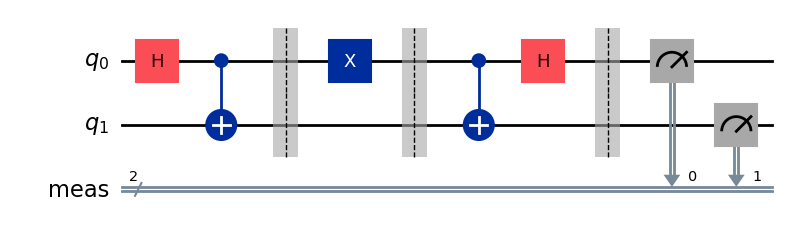

In [3]:
protocol = QuantumCircuit(2)

protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

if c == '1':
    protocol.x(0)   
if d == '1':
    protocol.z(0)
protocol.barrier()

protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output='mpl'))

Outcome: 10, Frequency: 1.0


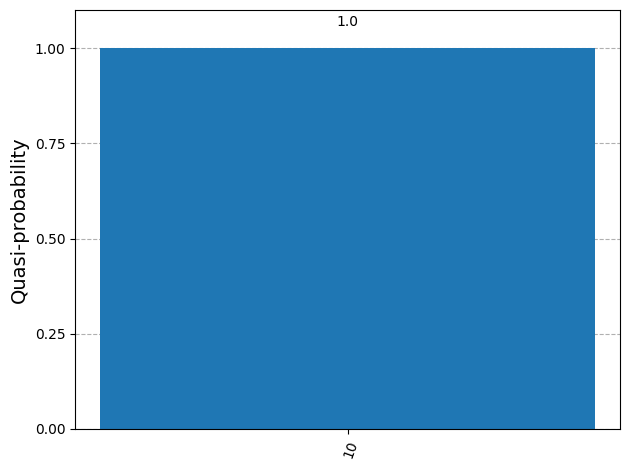

In [6]:
result = Sampler().run([protocol]).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Outcome: {outcome}, Frequency: {frequency}")

display(plot_histogram(statistics))

In [10]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice_c")
Alice_d = ClassicalRegister(1, "Alice_d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_c, Alice_d)

In [11]:
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "randomizer"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [12]:
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "randomizer"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [13]:
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "randomizer"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [14]:
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "randomizer"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

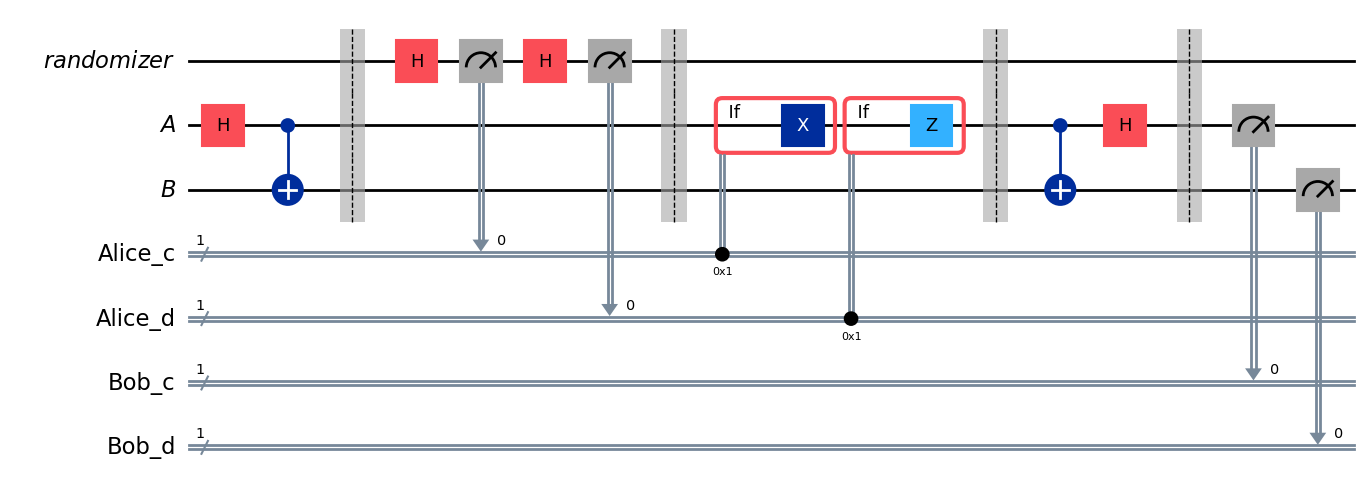

In [15]:
Bob_c = ClassicalRegister(1, "Bob_c")
Bob_d = ClassicalRegister(1, "Bob_d")
test.add_register(Bob_c)
test.add_register(Bob_d)
test.measure(ebit0, Bob_c)
test.measure(ebit1, Bob_d)
display(test.draw(output='mpl'))

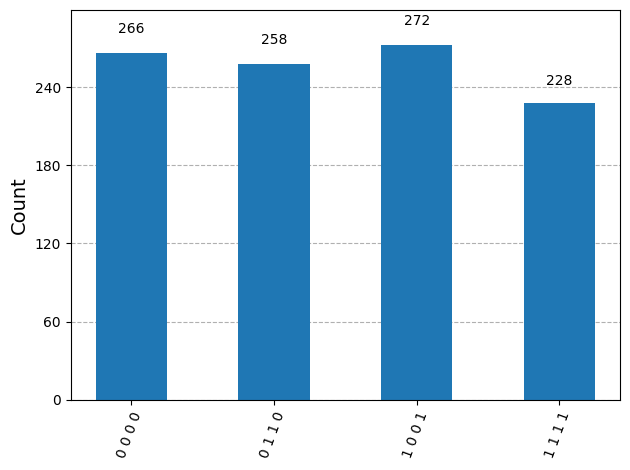

In [16]:
result = AerSimulator().run(test).result()
counts = result.get_counts()
display(plot_histogram(counts))